In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
house_model= pd.read_csv("new_housing_data.csv")
house_model.head(5)

,Order,Lot Frontage,Lot Frontage.1,Garage Area,House Style,Fireplaces,Garage Type,Garage Cars,Yr Sold,SalePrice
0,1,141.0,141.0,528.0,1Story,2,Attchd,2.0,2010,215000
1,2,80.0,80.0,730.0,1Story,0,Attchd,1.0,2010,105000
2,3,81.0,81.0,312.0,1Story,0,Attchd,1.0,2010,172000
3,4,93.0,93.0,522.0,1Story,2,Attchd,2.0,2010,244000
4,5,74.0,74.0,482.0,2Story,1,Attchd,2.0,2010,189900


In [28]:
house_model.isnull().sum()


Order               0
Lot Frontage      490
Lot Frontage.1    490
Garage Area         1
House Style         0
Fireplaces          0
Garage Type       157
Garage Cars         1
Yr Sold             0
SalePrice           0
dtype: int64

# we see there are some null values in the given dataset.

In [29]:
house_model.head(5)

,Order,Lot Frontage,Lot Frontage.1,Garage Area,House Style,Fireplaces,Garage Type,Garage Cars,Yr Sold,SalePrice
0,1,141.0,141.0,528.0,1Story,2,Attchd,2.0,2010,215000
1,2,80.0,80.0,730.0,1Story,0,Attchd,1.0,2010,105000
2,3,81.0,81.0,312.0,1Story,0,Attchd,1.0,2010,172000
3,4,93.0,93.0,522.0,1Story,2,Attchd,2.0,2010,244000
4,5,74.0,74.0,482.0,2Story,1,Attchd,2.0,2010,189900


In [30]:
year_sold = house_model['Yr Sold'].value_counts().sort_index()
year_sold

Yr Sold
2006    625
2007    694
2008    622
2009    648
2010    341
Name: count, dtype: int64

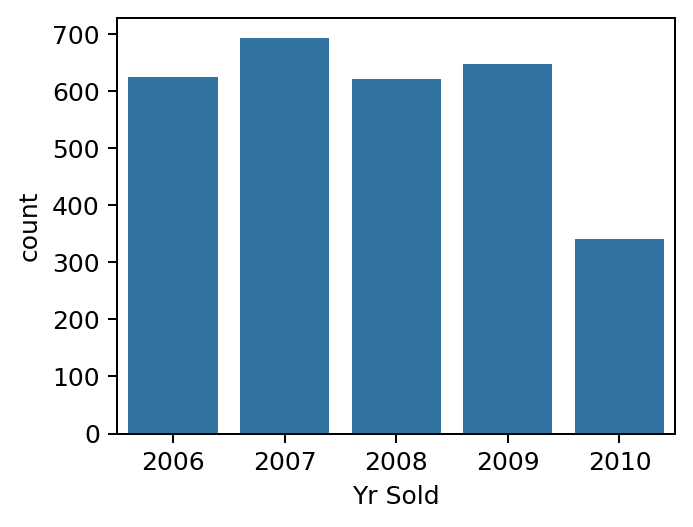

In [31]:
plt.figure(figsize=(4, 3),dpi=180)
sns.countplot(x="Yr Sold" , data = house_model)
bar_width = 0.25

# we see that the year in which the most houses were sold in is 2007

In [32]:
max_garge_area = house_model.groupby('Garage Area')['Garage Type'].max().reset_index()
top_5_garage_areas = max_garge_area.sort_values(by='Garage Area', ascending=False).head(5)
top_5_garage_areas

,Garage Area,Garage Type
602,1488.0,Detchd
601,1418.0,Attchd
600,1390.0,Attchd
599,1356.0,2Types
598,1348.0,Attchd


(array([1340., 1360., 1380., 1400., 1420., 1440., 1460., 1480., 1500.]),
 [Text(1340.0, 0, '1340'),
  Text(1360.0, 0, '1360'),
  Text(1380.0, 0, '1380'),
  Text(1400.0, 0, '1400'),
  Text(1420.0, 0, '1420'),
  Text(1440.0, 0, '1440'),
  Text(1460.0, 0, '1460'),
  Text(1480.0, 0, '1480'),
  Text(1500.0, 0, '1500')])

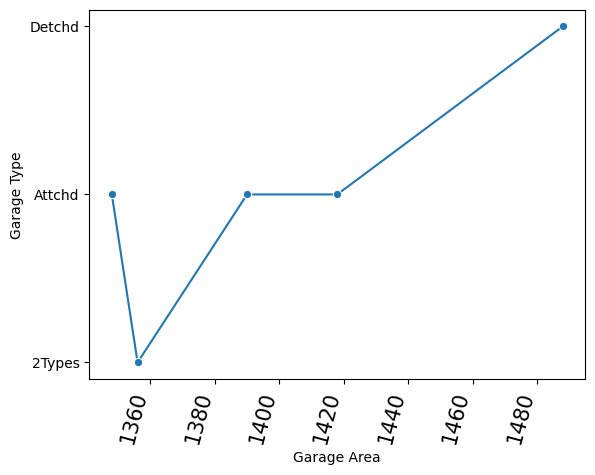

In [33]:
sns.lineplot(x='Garage Area', y='Garage Type' , data= top_5_garage_areas,marker='o')
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.xticks(rotation=75, ha='right')


# we see that the first highest data is an attached garage type.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [35]:
house_style = house_model['House Style'].value_counts().sort_index()
house_style

House Style
1.5Fin     314
1.5Unf      19
1Story    1481
2.5Fin       8
2.5Unf      24
2Story     873
SFoyer      83
SLvl       128
Name: count, dtype: int64

# We see that there are 8 unique values in the given dataset for the house style
I have exaplained the each house type in the added txt file.

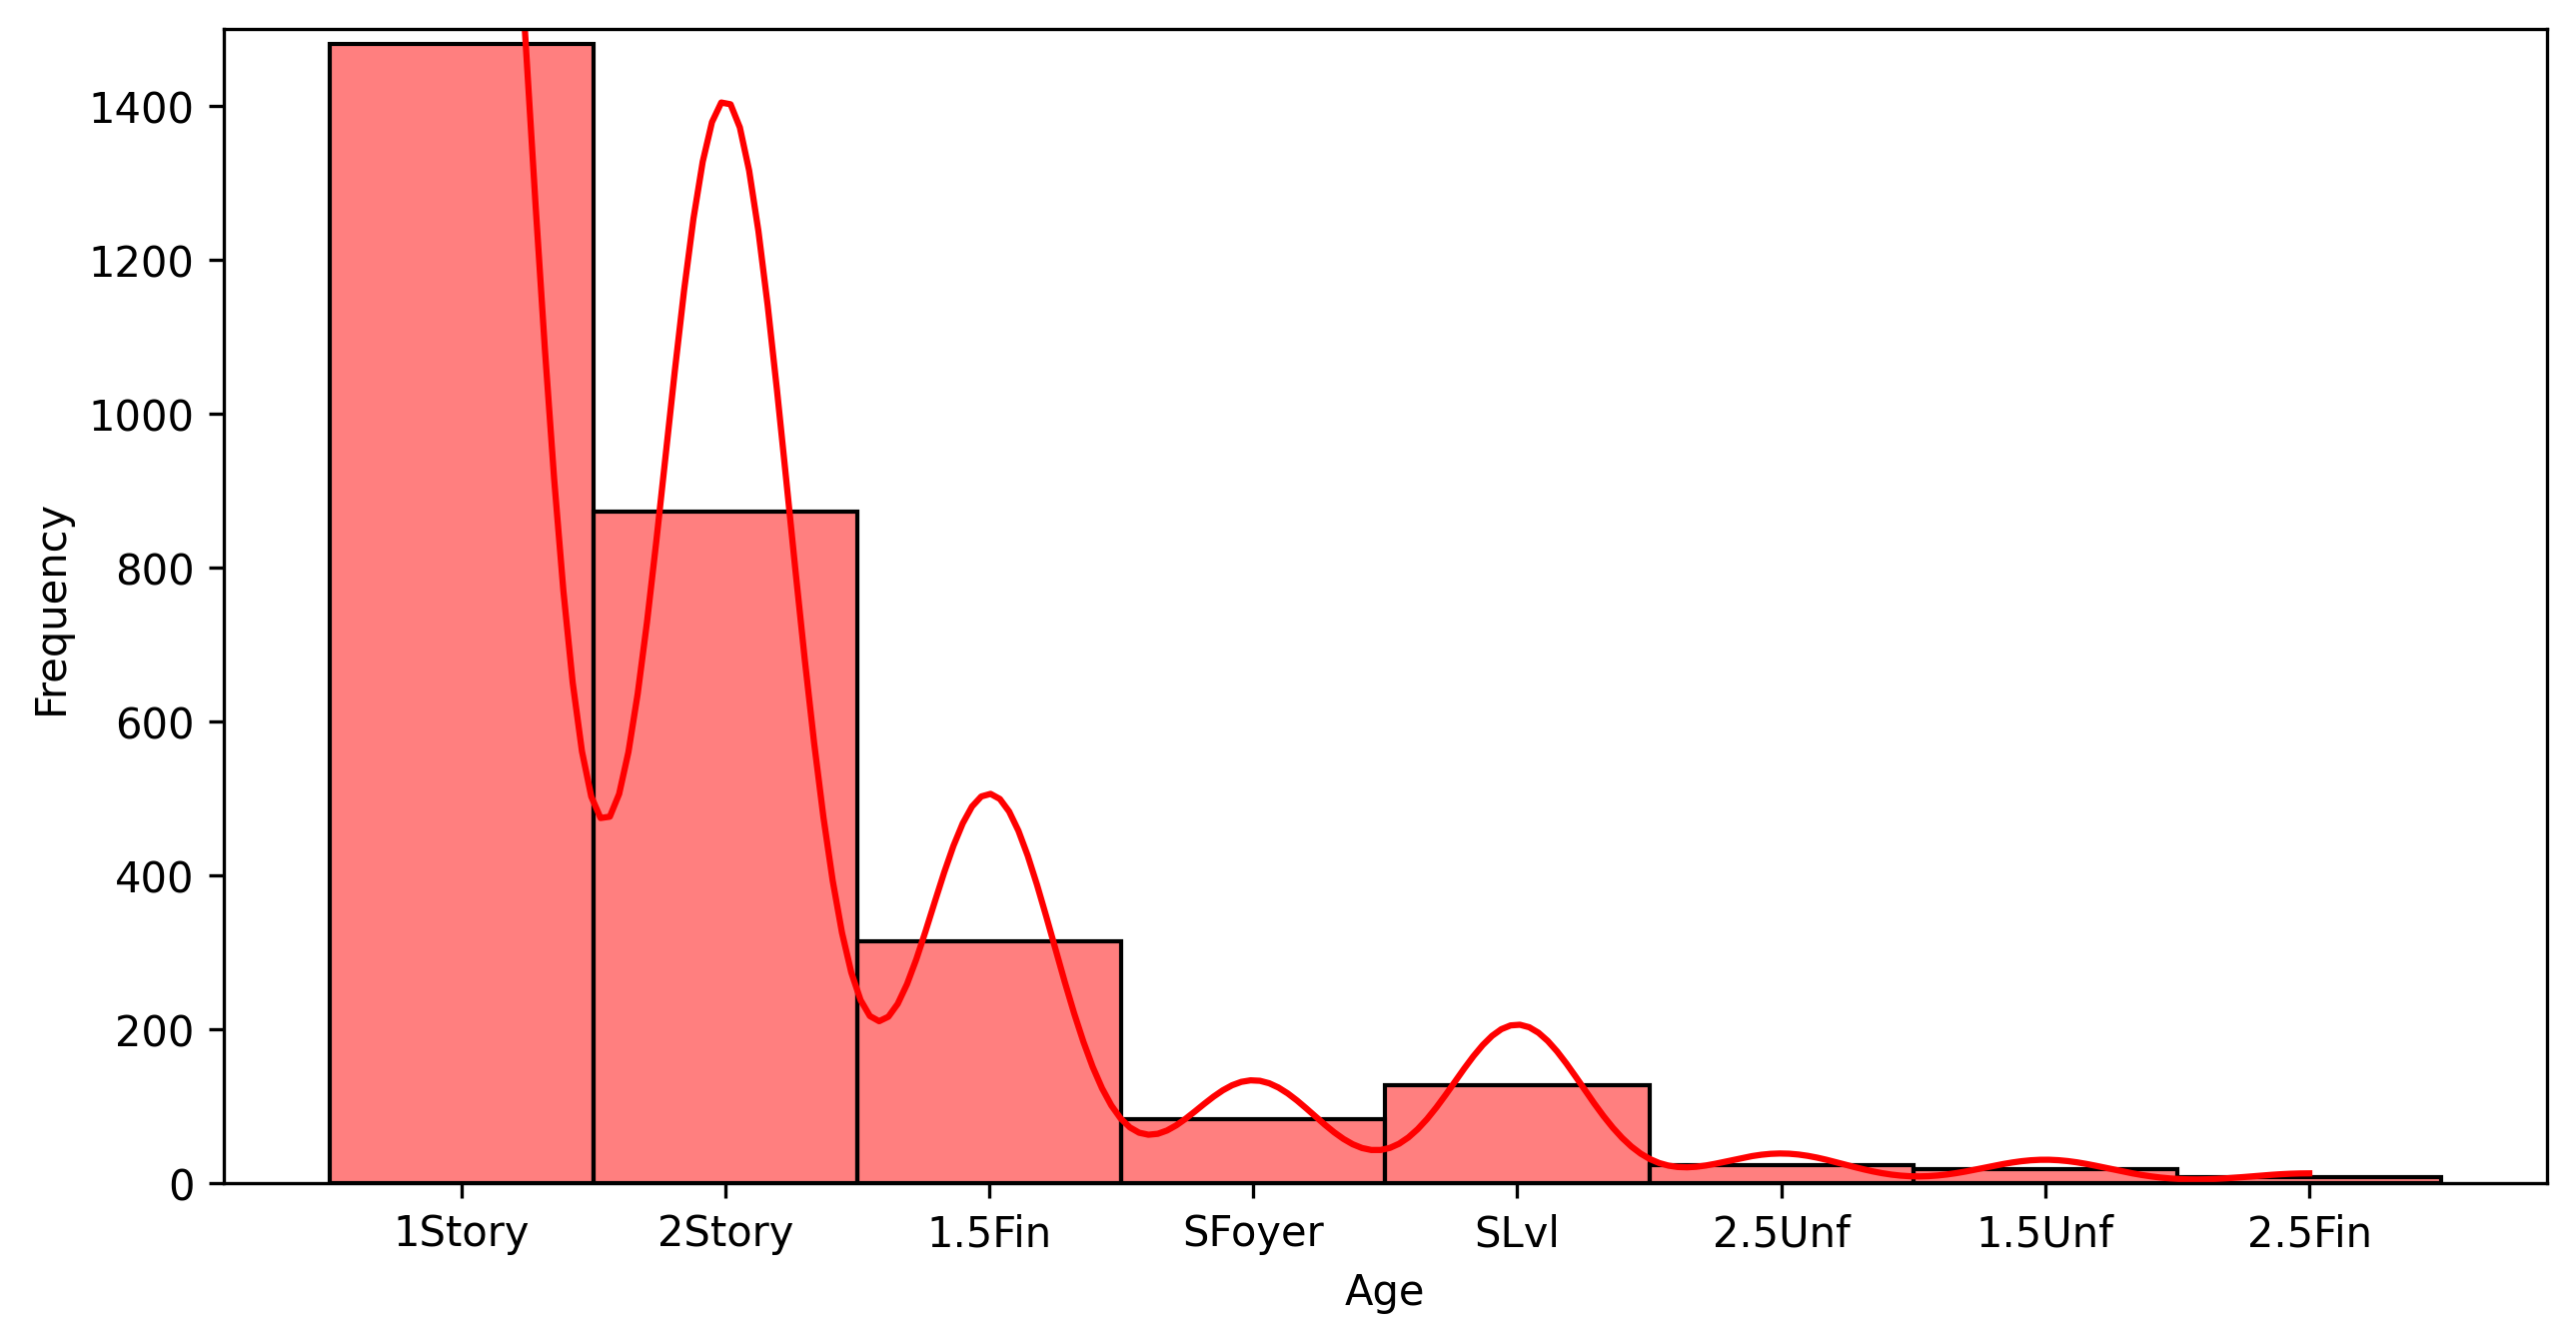

In [42]:
plt.figure(figsize=(10,5),dpi = 300)
sns.histplot(house_model['House Style'],bins = 11 , kde = True, color = 'red')
p=10
plt.xlabel('Age' ,fontsize= p)
plt.ylabel('Frequency' , fontsize= p)
plt.ylim(0, 1500)
plt.show()